In [6]:
import pandas as pd

# NO Redes de neuronas, No SVM, No arboles de decisión.
# SI algoritmos sencillos: Primeros vecinos KNN

- Visualización de datos

<font color='gray'>*Data Visualization*</font>


In [7]:
path = 'datasets/peliculas_a.csv'
peliculas_df = pd.read_csv(path)
peliculas_df

,#edad,años estudio,ciudad residencia,no. peliculas vistas año pasado,Acción,Drama,Romance,Ciencia ficción,Histórica
0,92,18,16,38,1,4,2,0,4
1,24,14,41,49,3,3,3,3,3
2,51,25,41,46,3,2,3,3,4
3,91,23,23,46,1,4,2,1,4
4,28,19,7,36,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
1802,22,18,35,43,3,3,3,3,3
1803,37,11,44,5,3,3,3,3,3
1804,27,13,26,12,3,3,3,3,3
1805,38,12,38,37,3,3,3,3,3


In [5]:
print(peliculas_df.head(5).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
 & #edad & años estudio & ciudad residencia & no. peliculas vistas año pasado & Acción & Drama & Romance & Ciencia ficción & Histórica \\
\midrule
0 & 92 & 18 & 16 & 38 & 1 & 4 & 2 & 0 & 4 \\
1 & 24 & 14 & 41 & 49 & 3 & 3 & 3 & 3 & 3 \\
2 & 51 & 25 & 41 & 46 & 3 & 2 & 3 & 3 & 4 \\
3 & 91 & 23 & 23 & 46 & 1 & 4 & 2 & 1 & 4 \\
4 & 28 & 19 & 7 & 36 & 3 & 3 & 3 & 3 & 3 \\
\bottomrule
\end{tabular}



In [4]:
peliculas_df.describe()

,#edad,años estudio,ciudad residencia,no. peliculas vistas año pasado,Acción,Drama,Romance,Ciencia ficción,Histórica
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,56.866076,15.250138,25.152739,32.874377,2.002214,2.970116,2.792474,2.309353,3.048700
std,23.425592,5.104389,14.167637,18.317226,1.259733,0.647162,0.752691,1.242936,0.899648
min,16.000000,6.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
25%,37.000000,11.000000,13.000000,17.000000,1.000000,3.000000,3.000000,1.000000,3.000000
50%,57.000000,15.000000,25.000000,33.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,77.000000,19.000000,38.000000,49.000000,3.000000,3.000000,3.000000,3.000000,4.000000
max,98.000000,26.000000,49.000000,64.000000,3.000000,4.000000,4.000000,4.000000,5.000000


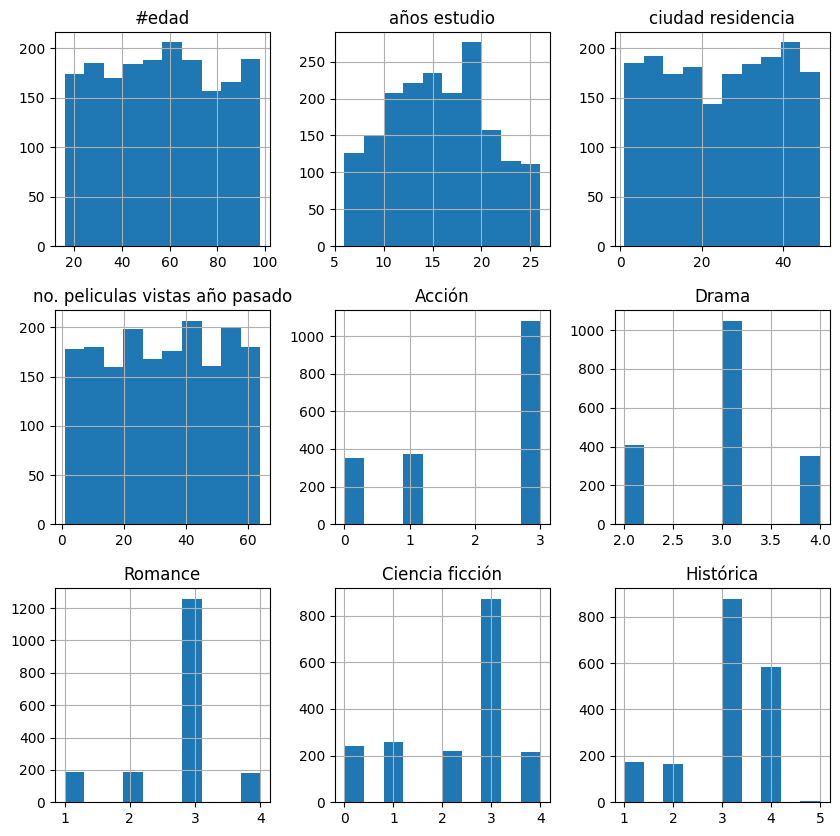

In [8]:
_ = peliculas_df.hist(figsize=(10,10))

- Número de valores nulos

<font color='gray'>*Number of null values*</font>

In [3]:
# Número de NA
peliculas_df.isna().sum()

#edad                              0
años estudio                       0
ciudad residencia                  0
no. peliculas vistas año pasado    0
Acción                             0
Drama                              0
Romance                            0
Ciencia ficción                    0
Histórica                          0
dtype: int64

- Conclusión

*Conclusion*

Parece que todas las variables predictoras se distribuyen uniformemente (#edad, ciudad residencia, no. peliculas vistas año pasado) excepto 'años estudio' que parece acercarse a una *normal*. En cuanto a las variables de respuesta, tienen distintas distribuciones pero cualitativamente parecen tener una tendencia a preferir la calificación $3$. Es necesario analizar la correlación entre las variables para reducir dimensionalidad y fuentes de ruido; esto se realizará para cada uno de los modelos requeridos.


<font color='gray'>*Every independent variable seems to be uniformly distributed (#edad, ciudad residencia, no. peliculas vistas año pasado) except for 'años estudio' which has shape closer to the one of a normal distribution. On the other hand, the dependent variables are distributed differently, but they seem to roughly tend to pile up on the $3$ value. It is necessary to analyze correlation between variables for reducing dimensionality and noise sources; that will be carried out for each of the required models.*</font>


# PCA

In [9]:
from sklearn.model_selection import train_test_split
X = peliculas_df[peliculas_df.columns[:4]]#.values
y = peliculas_df.drop(peliculas_df.columns[:4], axis = 1)#.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2024)

In [10]:
# Estandarización
# dim=4
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
import numpy as np
# Obtener matriz de covarianza, eigenvalores y eigenvectores
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals : ', eigen_vals)

Eigenvals :  [0.9048701  0.96917876 1.08830123 1.04041999]


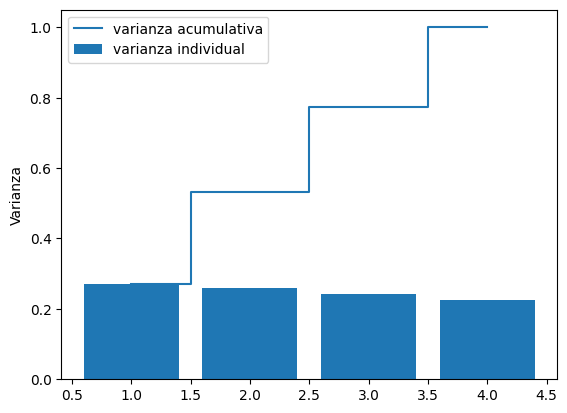

In [14]:
import matplotlib.pyplot as plt
# Gráfica con los aportes de cada eigenvalor
tot = sum(eigen_vals) # Suma de eigenvals
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse = True)] # Luego se ordenan descendente, y se dividen entre el total
cum_var_exp = np.cumsum(var_exp)
# Gráfica
plt.bar(range(1,5), var_exp, label = 'varianza individual', align = 'center')
plt.step(range(1,5), cum_var_exp, where = 'mid', label = 'varianza acumulativa')
plt.legend(loc = 'best')
plt.ylabel('Varianza')
plt.show()

Todas las variables tienen una comparable varianza individual, por lo que una mejor predicción se daría considerando las 4 variables. Se podría hacer mediante un arbol de decisión, pero debido a las limitaciones en las instrucciones, se optará por un enfoque más superficial.

<font color='gray'>*Every variable has comparable individual variance, so the best prediction should be considering the all 4 variables. A decision tree may be used for that matter, but a shallower approach will be preferred due to the limitations in the instructions.*</font>